# Capítulo 5: Cálculo Vectorial y Gradiente Descendente

En este notebook visualizaremos una función cuadrática en 3D y utilizaremos el cálculo de gradientes implementado para simular un paso de optimización.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Añadir ruta de build
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build/Release')))

import mathml_cpp

## 1. Definición de la Función Cuadrática
$$ f(x) = 0.5 x^T A x + b^T x $$
Usaremos:
$$ A = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}, b = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $$
Esto forma un paraboloide con mínimo en $(0,0)$.

In [ ]:
A = np.array([[2.0, 0.0], [0.0, 2.0]])
b = np.array([0.0, 0.0])

# Wrapper python para llamar a la funcion C++ vectorizada
def func_wrapper(x_vec):
    return mathml_cpp.vector_calculus.quadratic_function(A, b, x_vec)

# Simular Gradiente Descendente
start_point = np.array([2.0, 2.0])
learning_rate = 0.1
path = [start_point]

current_point = start_point
for _ in range(10):
    # Calcular gradiente
    
    grad = mathml_cpp.vector_calculus.numerical_gradient(current_point, func_wrapper, 1e-5)
    
    current_point = current_point - learning_rate * grad
    path.append(current_point)

path = np.array(path)

## 2. Visualización 3D

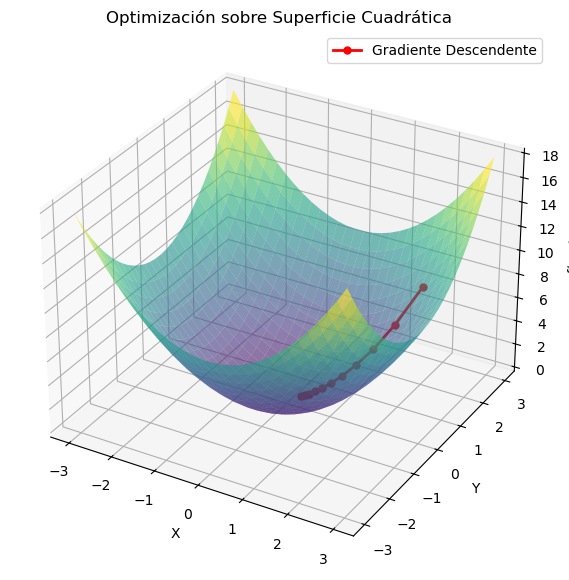

In [4]:
x_range = np.linspace(-3, 3, 30)
y_range = np.linspace(-3, 3, 30)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vec = np.array([X[i,j], Y[i,j]])
        Z[i,j] = func_wrapper(vec)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Superficie
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Ruta del gradiente
z_path = [func_wrapper(p) for p in path]
ax.plot(path[:,0], path[:,1], z_path, 'r.-', linewidth=2, markersize=10, label='Gradiente Descendente')

ax.set_title("Optimización sobre Superficie Cuadrática")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x,y)')
plt.legend()
plt.show()